<a href="https://colab.research.google.com/github/athulrj02/TwiPipeline/blob/main/DA%7CCA_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Athul Raj

**20035410**

In [14]:
# !pip install tweepy pandas

In [15]:
import tweepy

In [3]:
import pandas as pd

In [17]:
API_Key = '5XgfETdNVSmUpMqj9WpSU2zh6'
API_Secret = 'K02FKsDiUQZUXek5ktTkFiDlVl8Fx9lelrtQvLeFsXQyqEZipj'
Bearer_token = 'AAAAAAAAAAAAAAAAAAAAALoyxAEAAAAAQOYOKoNfaR8xGVY04pCxOPbkY2I%3D2ontK1UxhMQDEnMdI21yIMcpKbROuyT6tewICojnRsLm9TmxYL'

client = tweepy.Client(bearer_token= Bearer_token)

In [18]:
query = 'cybersecurity lang:en -is:retweet'

In [19]:
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['id','text', 'created_at'])

data= []
for tweet in tweets.data:
  data.append({
      'Tweet ID': tweet.id,
      'Text': tweet.text,
      'Created At': tweet.created_at
  })
df = pd.DataFrame(data)
print(df.head())

df.to_csv('cybersecurity_tweets.csv', index=False)

              Tweet ID                                               Text  \
0  1858590279214768547  A Critical Wake-Up Call: VMware vCenter Server...   
1  1858590255693070509  🚨 Vulnerability Alert! USN-7104-1 impacts #cur...   
2  1858590166194987504  In the fast-paced tech landscape, mastering th...   
3  1858590148667031828  @KryptoKnight_1 Send the proof to @HowardGigs ...   
4  1858590125325746364  Generative AI, Cybersecurity, and Ethics, publ...   

                 Created At  
0 2024-11-18 19:17:08+00:00  
1 2024-11-18 19:17:02+00:00  
2 2024-11-18 19:16:41+00:00  
3 2024-11-18 19:16:37+00:00  
4 2024-11-18 19:16:31+00:00  


Saving the dataset to Google Drive
* Mounted Drive
* Saved to the folder,
* Loading dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/cybersecurity_tweets.csv', index=False)

In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/cybersecurity_tweets.csv'
df = pd.read_csv(file_path)
print(df.head())

              Tweet ID                                               Text  \
0  1858590279214768547  A Critical Wake-Up Call: VMware vCenter Server...   
1  1858590255693070509  🚨 Vulnerability Alert! USN-7104-1 impacts #cur...   
2  1858590166194987504  In the fast-paced tech landscape, mastering th...   
3  1858590148667031828  @KryptoKnight_1 Send the proof to @HowardGigs ...   
4  1858590125325746364  Generative AI, Cybersecurity, and Ethics, publ...   

                  Created At  
0  2024-11-18 19:17:08+00:00  
1  2024-11-18 19:17:02+00:00  
2  2024-11-18 19:16:41+00:00  
3  2024-11-18 19:16:37+00:00  
4  2024-11-18 19:16:31+00:00  


In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Preprocessing**

Includes:
* Removing noises such as URL's, special Characters, whitespaces
* Normalizing
* Word tokenization
* Removing stopwords(the, and, etc..)
* Lemmatization

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
def preprocess_tweet(text):
  #removing urls
  text =re.sub(r'http\S+|www\S+|https\S+','', text, flags = re.MULTILINE)

  #removing unwantedd special characters and nums
  text = re.sub(r'\@\w+|\#','',text)
  text = re.sub(r'[^A-Za-z\s]','',text)

  # convert into lowercase
  text = text.lower()

  #tokenization
  tokens = word_tokenize(text)

  # stopwords removing
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  processed_text = ' '.join(tokens)
  return processed_text

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
df['Cleaned text'] = df['Text'].apply(preprocess_tweet)

In [20]:
df.to_csv('cleaned_cybersecurity_tweets.csv', index=False)
print(df.head)

<bound method NDFrame.head of                Tweet ID                                               Text  \
0   1858590279214768547  A Critical Wake-Up Call: VMware vCenter Server...   
1   1858590255693070509  🚨 Vulnerability Alert! USN-7104-1 impacts #cur...   
2   1858590166194987504  In the fast-paced tech landscape, mastering th...   
3   1858590148667031828  @KryptoKnight_1 Send the proof to @HowardGigs ...   
4   1858590125325746364  Generative AI, Cybersecurity, and Ethics, publ...   
..                  ...                                                ...   
95  1858586054443602219  With healthcare being a prime target for attac...   
96  1858586047791136968  Are your employees your biggest cybersecurity ...   
97  1858586042447573309  Revealing Ransomware 🚨: Protect Your Digital L...   
98  1858586039880736958  For a comprehensive discussion of the impact o...   
99  1858586027666924015  The rise of smart contracts and strategies for...   

                   Created At  \


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet ID      100 non-null    int64 
 1   Text          100 non-null    object
 2   Created At    100 non-null    object
 3   Cleaned text  100 non-null    object
 4   cleaned_text  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [25]:
df.shape

(100, 5)

In [16]:
df['Cleaned text'].describe()

,Cleaned text
count,100
unique,91
top,exacerbating cybersecurity talentshortage burn...
freq,7


In [12]:
sample_text = df['Text'][18]
sample_output = df['Cleaned text'][18]
print(sample_text,'\n')
print(sample_output)

@onhopium @instagram @Meta Have you tried contacting @jaketechh on Twitter? He's an amazing cybersecurity agent. He identifies tech issues and provides solutions. Message him for assistance on your account. 

tried contacting twitter he amazing cybersecurity agent identifies tech issue provides solution message assistance account


Word frequency analysis

Analysing most frequently used words

In [27]:
from collections import Counter

In [45]:

all_words = ' '.join(df['Cleaned text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('cybersecurity', 112), ('risk', 12), ('key', 12), ('learn', 12), ('secure', 11), ('cyber', 11), ('security', 11), ('threat', 10), ('strategy', 10), ('read', 10), ('ai', 9), ('role', 9), ('business', 9), ('amp', 8), ('crisis', 8), ('important', 8), ('hacking', 7), ('system', 7), ('tech', 7), ('data', 7)]


In [34]:
import matplotlib.pyplot as plt

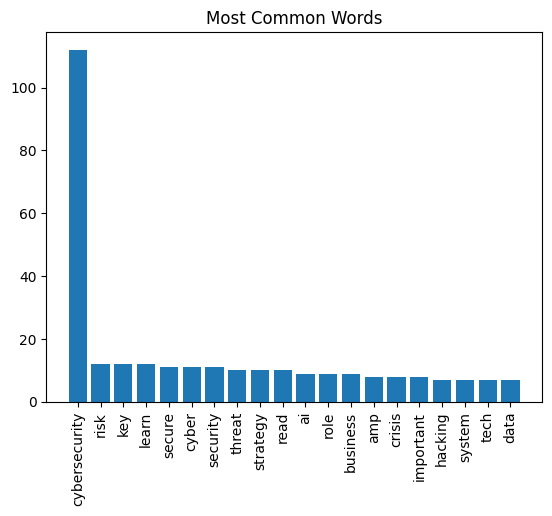

In [44]:
# visualizing the word freq
words, counts=zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Words")
plt.show()

In [46]:
from wordcloud import WordCloud

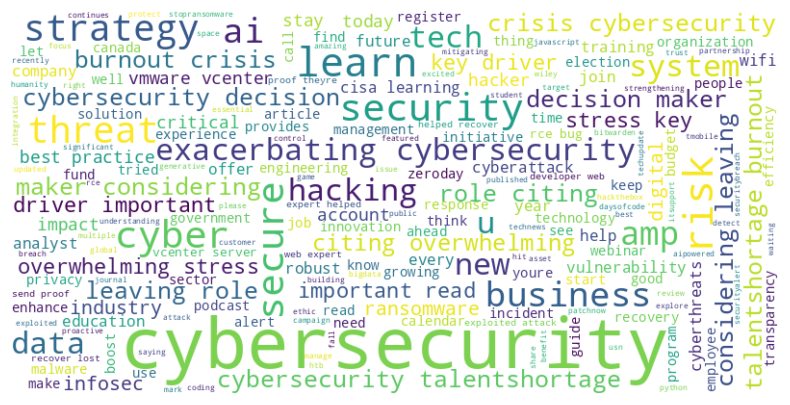

In [47]:
wordcloud = WordCloud(width=800, height = 400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()